<font color='Brown'><h1 align ="center">Personal Loan prediction</h2></font>

- Introduction
- Data Set
- Project Overview
- Projett Motivation
- Gatgering Data
- Exploratory Data Analysis
- Modelling
- Conclusion

## <font color ='brown'>Introduction</font>

Your client is a banking service provider in the US.They are experiencing issues related to customers personal loan prediction.

**In this project we are going to predict which customer will take personal loan. <br>
we will use classification algorithms to differentiate people with buy loan vs the who will not.**

## <font color ='brown'>Data Set</font>

- The files contains data of 5000 customers.The data include customer demographic information(age , income etc.) , customer relationship with bank and customers response on campaign on personal loan.

**Attribute Information**

- **CCAvg**                       : Avg speding on credit  cards per month
- **Education Level**             : 1:UG , 2:Graduate , 3:Advance/Professional
- **Mortgage**                    :Value of house mortgage if any

## <font color ='brown'>Project Objective</font>

Client is interested in understanding the leading indicatior for interested customers for personal loan.This will enable them to take pre-emptive action such offering better plans to encouraging them to take personal loan.

## <font color ='brown'>Importing Libraries</font> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


## <font color ='brown'>Gathering Data</font>

In [2]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df = bank_df.copy()

## <font color ='brown'>Data Shape</font> 

In [3]:
print('Shape of data{}'.format(df.shape))
print("Number of rows:{}".format(df.shape[0]))
print("Number of rows:{}".format(df.shape[1]))

Shape of data(5000, 14)
Number of rows:5000
Number of rows:14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


you can see we don't have any categoricals columns.

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Observation:</p>

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are 13 features and 5000 entires, all non-null. all features are numerical features, and of them, Education , Mortagage , Securities Account , CD Account , Online ,Credit Card , Personal Loan is a numerical categorical feature.</p>

## <font color ='brown'>Missings And duplicates values</font> 

In [5]:
print(df.isna().sum().sort_values(ascending = False))
print('duplicate values in  df are' ,df.duplicated().sum() )
print('duplicates dropped')

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64
duplicate values in  df are 0
duplicates dropped


There is not any missings values and also not any duplicaltes values.

**Missing Data - Initial Intuition**

Here, we don't have any missing data.
General Thumb Rules:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

## <font color ='brown'>Dropping Unnecessary columns 'ID' and 'ZIP Code'</font> 

In [8]:
df.drop(columns = ['ID' , 'ZIP Code'] ,  axis = 1 , inplace =True)

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Target Varaible is :Personal Loan</p>


In [9]:
#create counts of df for plotting categorical variables
loan = np.unique(df['Personal Loan'], return_counts=True)
print('loan = {}\n'.format(loan))

loan = (array([0, 1], dtype=int64), array([4520,  480], dtype=int64))



In [10]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

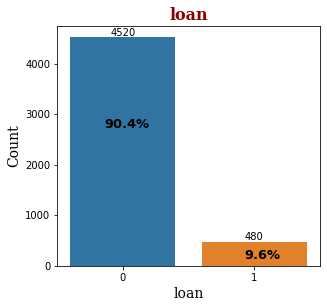

In [11]:
# Display a frequency distribution for Personal Loan. 
fig = plt.figure(figsize=[16,15]);
ax1 = fig.add_subplot(3, 3, 2);
sns.barplot(x=list(loan[0]), y=list(loan[1]), ax=ax1 );
ax1.text(0.2, 2800, '{}%' .format(str(round(loan[1][0]/sum(loan[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.text(1.2, 200, '{}%' .format(str(round(loan[1][1]/sum(loan[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.set_title('loan', fontdict=axtitle_dict);
ax1.set_xlabel('loan', fontdict=axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);
ax1.bar_label(ax1.containers[0])
plt.show()

Data is Highly Imblanaced.majority of the data are class 0.Imblanaced ratio is **90:10**.out of 5000 data 4520 is for not opting personal loan and 480 is for personal loan.

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Filtering Numericals and Categoricals columns:</p>

In [12]:
categ_columns = []
for col in df.columns:
    if df[col].nunique()<=5:
        if col!='Personal Loan':
            categ_columns.append(col) 
print('categ numericals columns are {}'.format(categ_columns))

categ numericals columns are ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [13]:
Num_cols = [col for col in df.columns if col not in categ_columns]
print('numericals columns are {}'.format(Num_cols)) 
Num_cols.pop() #Removing Personal Loan
Num_cols

numericals columns are ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']


['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

## <font color ='brown'>EDA</font>

In [14]:
#create counts of df for plotting categorical variables
Online_account = np.unique(df['Online'], return_counts=True)
print('Online_account = {}\n'.format(Online_account))

Online_account = (array([0, 1], dtype=int64), array([2016, 2984], dtype=int64))



This plot is for one columns.we can use for loop to plot subplots.

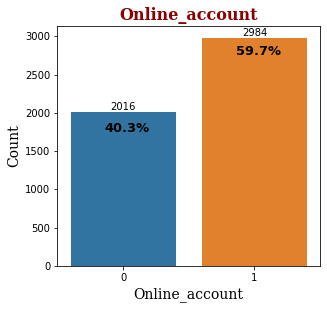

In [15]:
fig = plt.figure(figsize=[16,15]);
ax1 = fig.add_subplot(3, 3, 2);
sns.barplot(x=list(Online_account[0]), y=list(Online_account[1]), ax=ax1 );
#below two lines of codes of codes are for showing percentage values in bargraph
ax1.text(0.2, 1800, '{}%' .format(str(round(Online_account[1][0]/sum(Online_account[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.text(1.2, 2800, '{}%' .format(str(round(Online_account[1][1]/sum(Online_account[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.set_title('Online_account', fontdict=axtitle_dict);
ax1.set_xlabel('Online_account', fontdict=axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);
ax1.bar_label(ax1.containers[0])
plt.show()

## <font color ='brown'>Unvariate Analysis</font>


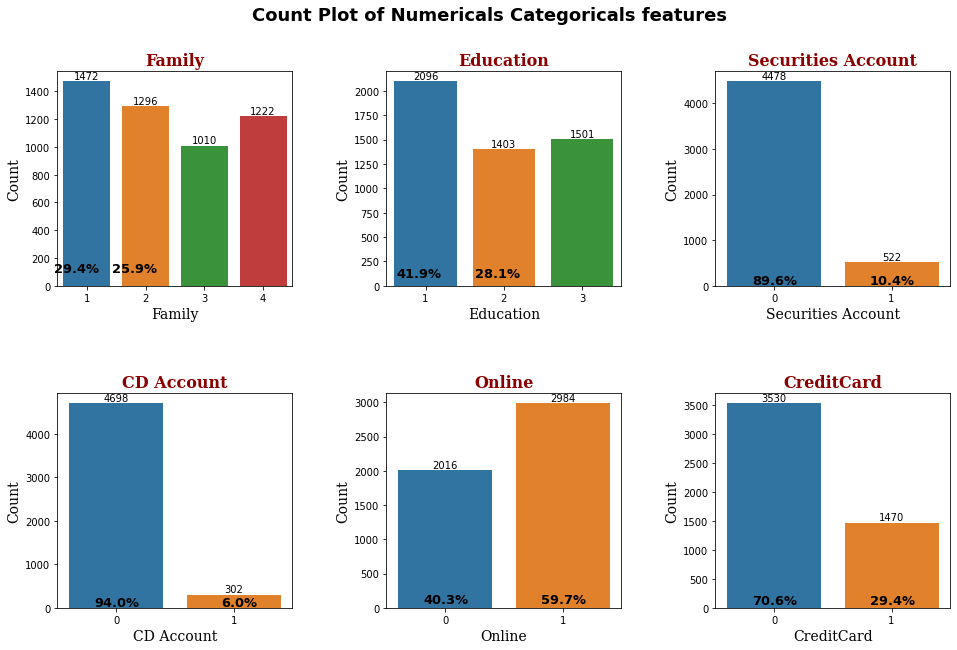

In [16]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Numericals Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(3, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict=axlab_dict)
    ax1.set_ylabel('Count', fontdict=axlab_dict)
    ax1.bar_label(ax1.containers[0])
#for showing percentage top of the bar we can increase 120

## <font color ='brown'>Distplot</font>

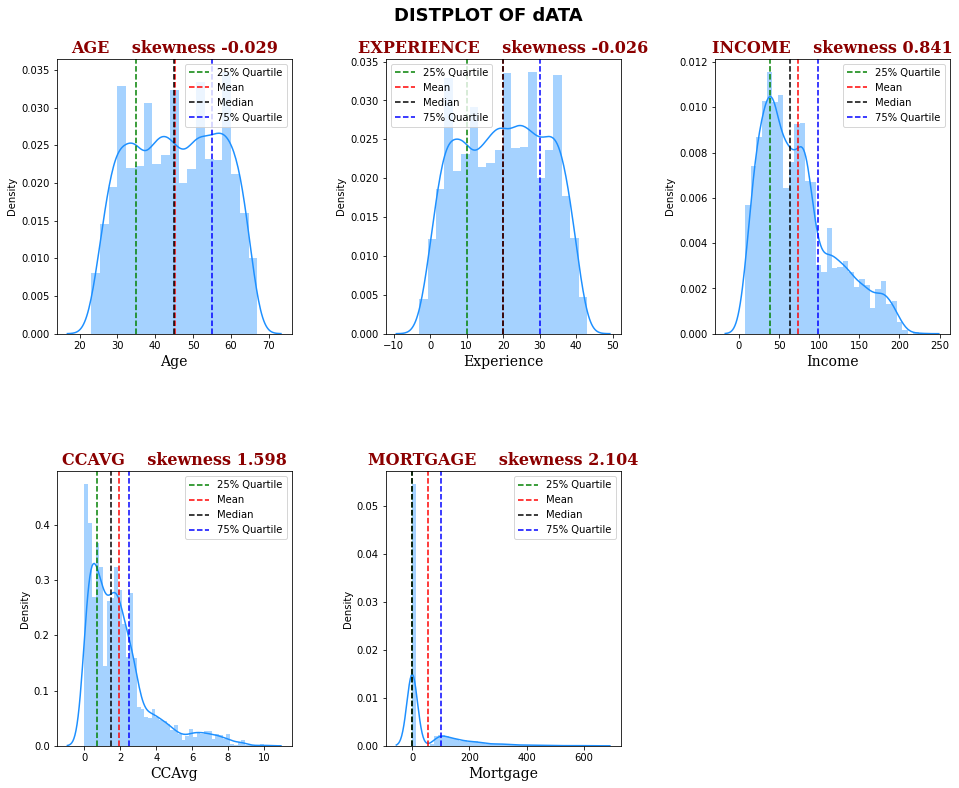

In [17]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(2, 3, i+1)
    ax = sns.distplot(df[col],  color='dodgerblue')
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

In [18]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue'];

## <font color ='brown'>Outliers Detection</font> 

In [19]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
# numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Age           False
Experience    False
Income         True
CCAvg          True
Mortgage       True
dtype: bool

Income , CCAvg , Mortgage have outliers.

## <font color ='brown'>Visualization of outliers using box plot</font>  

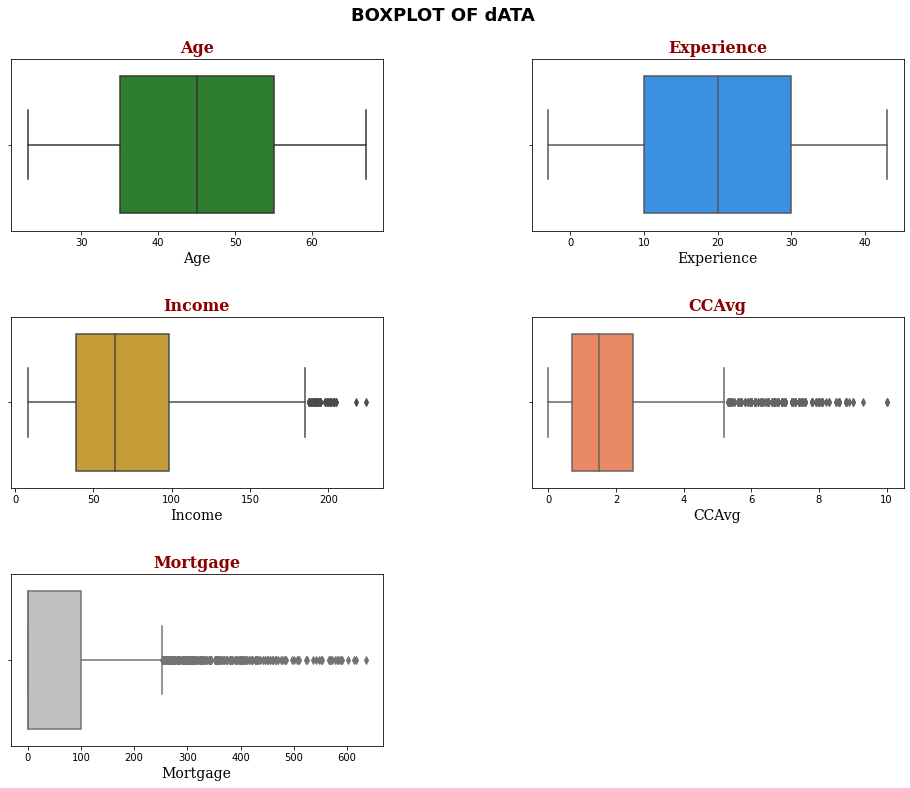

In [20]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

## <font color ='brown'>Outliers Detection</font>

In [21]:
# Finding the IQR For Budget columns
dict = {}
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In Above code cell i just created a dictionary to keep upper_limit and lower_limit of Income , CCAvg , Mortgage...

In [22]:
dict

{'upper_limit_Income': 186.5,
 'lower_limit_Income': -49.5,
 'upper_limit_CCAvg': 5.2,
 'lower_limit_CCAvg': -2.0,
 'upper_limit_Mortgage': 252.5,
 'lower_limit_Mortgage': -151.5}

In [23]:
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 Customers data which Income are less than lower limit.
There are total 96 Customers data which Income are more than upper limit.
There are total 0 Customers data which CCAvg are less than lower limit.
There are total 324 Customers data which CCAvg are more than upper limit.
There are total 0 Customers data which Mortgage are less than lower limit.
There are total 291 Customers data which Mortgage are more than upper limit.


**Capping Income , CCAvg and Mortgage with upper limit and lower limit.**

In [24]:
for col in ['Income' , 'CCAvg' , 'Mortgage']:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

**After Outliers treatment**

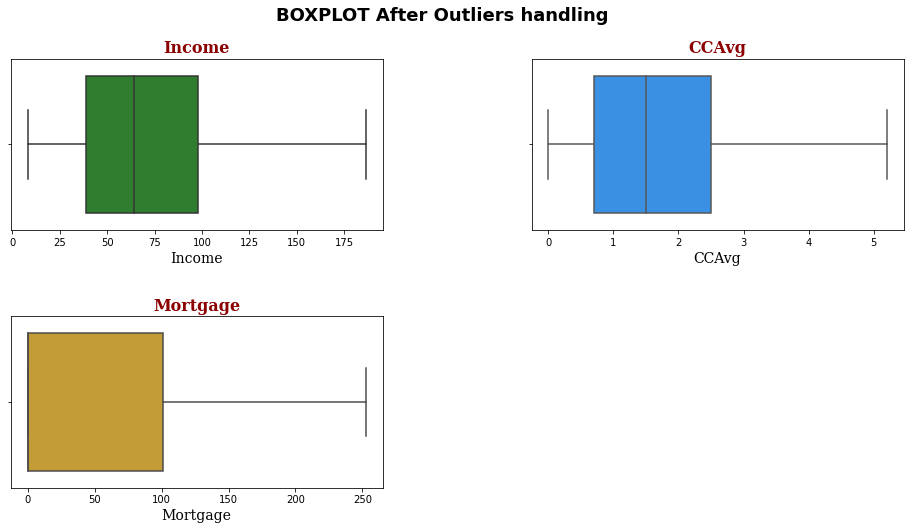

In [25]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('BOXPLOT After Outliers handling', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate( ['Income' , 'CCAvg' , 'Mortgage']):  
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
 
    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

## <font color ='brown'>Bivariate analysis</font>

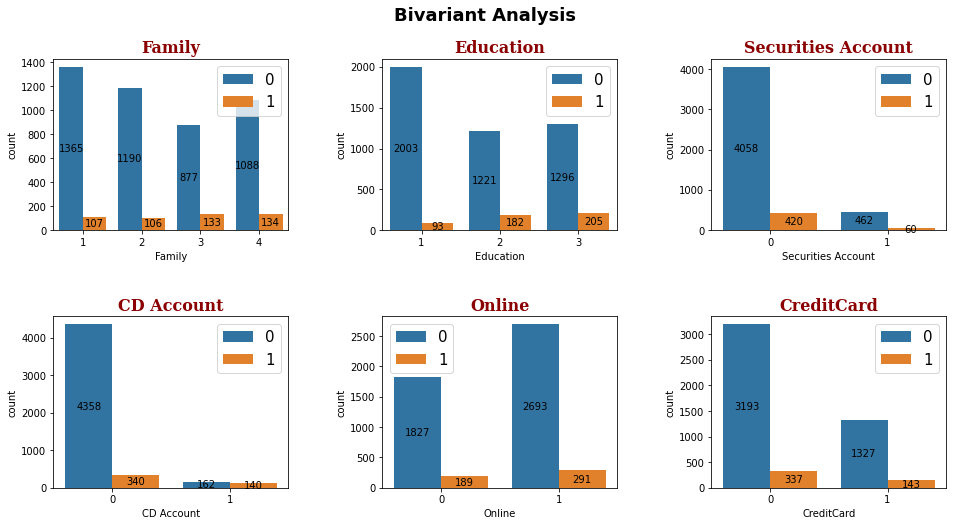

In [26]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.countplot(x = df[col] , ax=a , hue = df['Personal Loan'] )
    a.set_title(col , fontdict=axtitle_dict)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

**Plot Insights:**
    
- Highly educated customers seem to much interested in personal loan than lower educated customers.

- Customers without securites account seem to more interseted than not securities account customers in personal loan.

- Customers with CD Account have higher probablity to take personal loan.in bar graph you can clearly see out of 163 cd account customers 140 is taken personal loan.

- Customers with Online internet banking are more intersted than non online customers in personal loan.

- Customers without Credit Card have much higher chance to take personal loan.


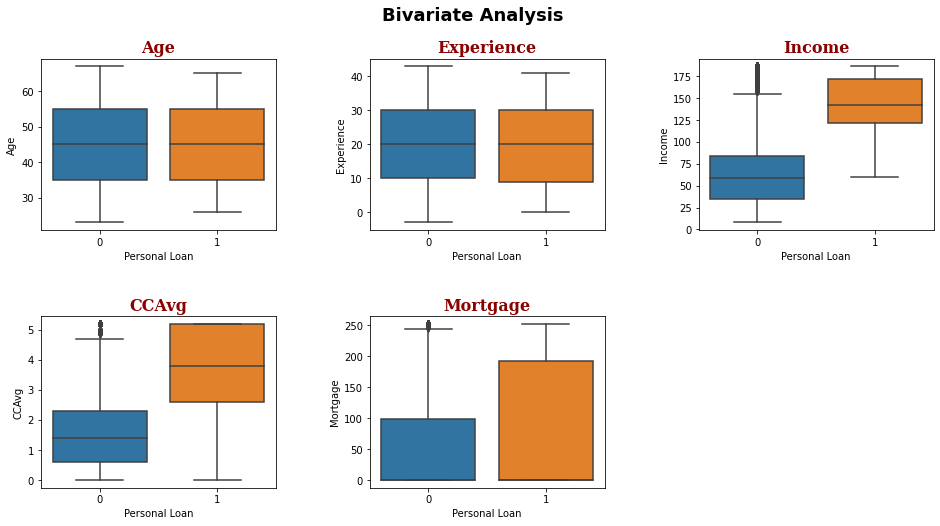

In [27]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'Personal Loan' , y =col , ax=a  , data = df )
    a.set_title(col , fontdict=axtitle_dict)

**Plot Insights:**

- Customers with personal loan Have Much higher Income with a median of 145 USD compared to a median of customers not opting for personal loan of median 55 USD.

- Customers who opted for personal loan have higher credit card avg spending with median 4 USD.

- Customers who opted for personal loan have slightly higher mortgate.

- Age and Experience doesn't have much effect on personal loan.

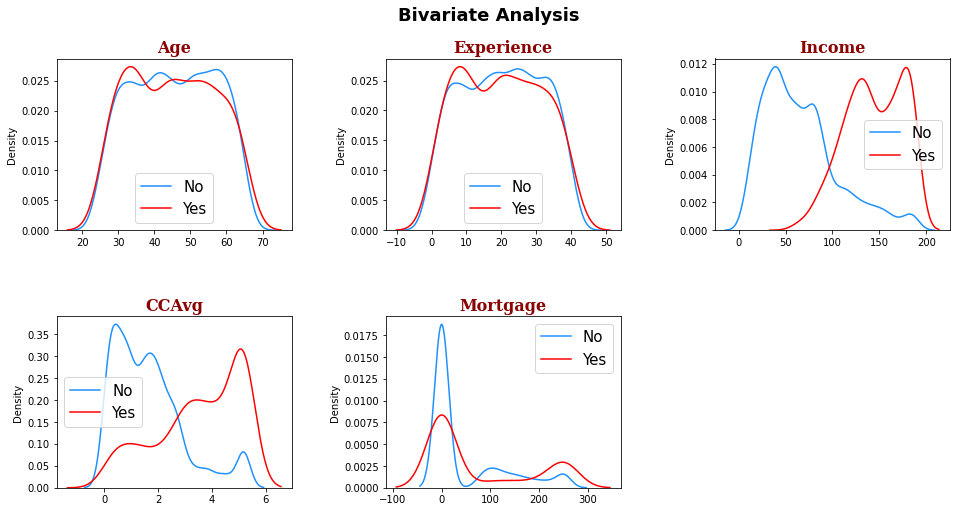

In [28]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(3, 3, i+1)
    
    sns.distplot(x =df[df['Personal Loan']==0][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['Personal Loan']==1][col],  color='red' , ax=a , hist =False) 
    a.set_title(col , fontdict=axtitle_dict)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

### Creating Dummies for Categ columns

In [29]:
dum_df = pd.get_dummies(df , columns = categ_columns)
dum_df.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49.0,1.6,0.0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,19,34.0,1.5,0.0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,15,11.0,1.0,0.0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100.0,2.7,0.0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45.0,1.0,0.0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1


## <font color ='brown'>Correlation Analysis</font>


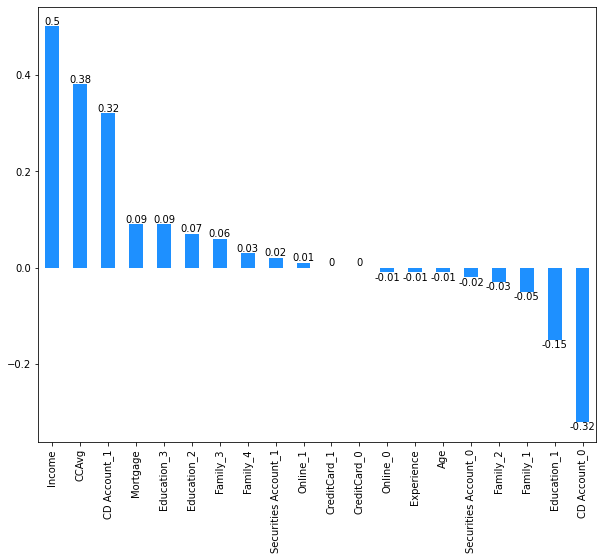

In [30]:
ax = round(dum_df.corr()['Personal Loan'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (10,8))
ax.bar_label(ax.containers[0])
plt.show()

**Derived Insight:**

**HIGH Possibility to take personal loan**  seen in case of  **Higher Income**, **High Credit Cards Spending**, and **Customers with  CD Account**, 

**HIGH Possibility to take personal loan**  is seen in case of **Without CD Account**, **Lower Eduction** and **With One Family Members**

Factors like **Credit Cards Availability**, **Availability of Online Internet Banking**  have alomost **NO** impact on personal loan.

This is also evident from the **Heatmap** below

## <font color ='brown'>Heatmap</font>

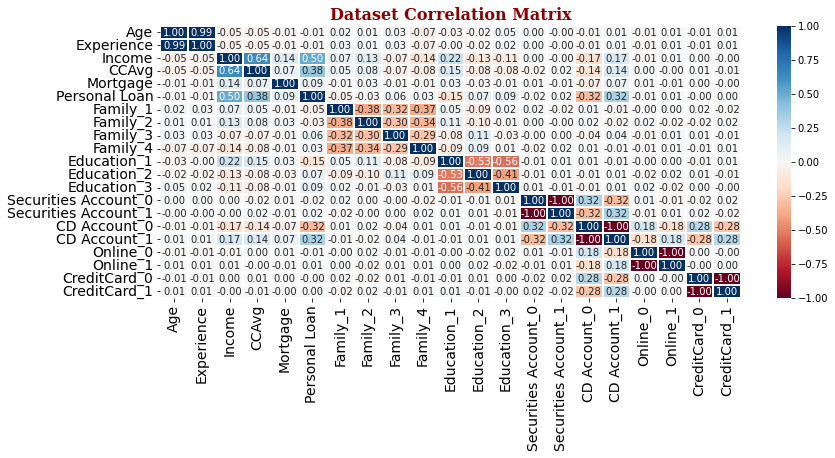

In [31]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(dum_df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

## <font color ='brown'>Modelling</font>

In [32]:
X = dum_df.drop('Personal Loan' , 1 )
y = dum_df['Personal Loan']

In [33]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.33 , random_state = 42)

In [34]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((3350, 20), (3350,), (1650, 20), (1650,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier

The models used include:

- K Nearest Neighbors - fast, simple and instance-based
- Logistic Regression - fast and linear model
- Random Forest - slower but accurate ensemble model based on decision trees
- Support Vector Machines - slower but accurate model used here in the non-linear form- 

In [36]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 

In [37]:
def Model_features(X_train , y_train , X_test , y_test , y_pred , classifier  , model_name):
#     fig ,ax = plt.subplots(figsize = (7,6))
    accuracy , precision , recall , f1_s = round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average="micro")  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    
#     print(f'f1  Score is :{round(specificity_score(y_test , y_pred) , 3)}')
    print(metrics.classification_report(y_test, y_pred)) 

### Features Importanaces

In [38]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False) ,2 )
    
    top_weights_selected = weights[:5]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    
    return print("")

In [39]:
def confusion_matrix_plot(X_test , y_test , classifier ,classifier_name):
    ax = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Personal Loan", "Personal Loan"], cmap=plt.cm.Blues, normalize='true')

### Logistic Regression

In [40]:
model_lr= LogisticRegression(random_state=0)  
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test)
model_lr.score(X_test , y_test)

0.9660606060606061

Accuracy Score is :0.966
Precision Score is :0.966
Recall Score is :0.741
f1  Score is :0.818
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1480
           1       0.91      0.74      0.82       170

    accuracy                           0.97      1650
   macro avg       0.94      0.87      0.90      1650
weighted avg       0.96      0.97      0.96      1650




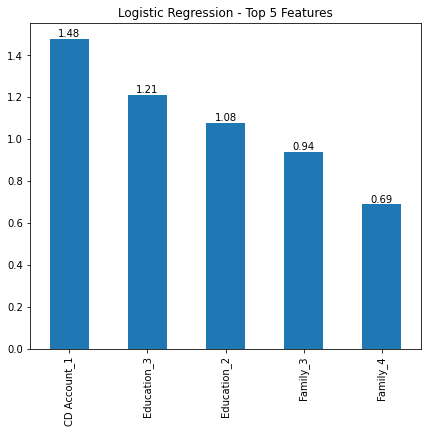

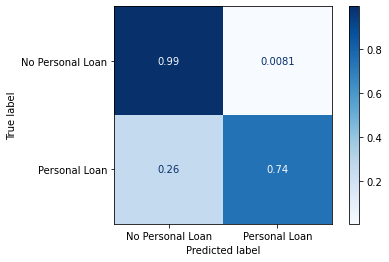

In [41]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , model_lr , "Logistic Reegression")   
feature_weights(X_train , model_lr , "Logistic Regression")
confusion_matrix_plot(X_test , y_test , model_lr , "Logistic Regression")

### KNN Classifier

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn.score(X_test , y_test)

0.8927272727272727

Accuracy Score is :0.893
Precision Score is :0.893
Recall Score is :0.218
f1  Score is :0.295
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1480
           1       0.46      0.22      0.29       170

    accuracy                           0.89      1650
   macro avg       0.69      0.59      0.62      1650
weighted avg       0.87      0.89      0.88      1650



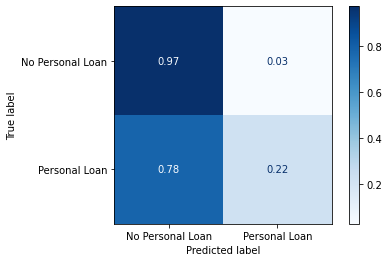

In [43]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , knn , "Knn Classifier")   
confusion_matrix_plot(X_test , y_test , knn , "Knn Classifier")

Knn is giving good result for majority call 0 but for class 1 logistic regression is better than this.

### Random Forest Classifier

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test , y_test) 

0.9903030303030304

Accuracy Score is :0.99
Precision Score is :0.99
Recall Score is :0.924
f1  Score is :0.952
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1480
           1       0.98      0.92      0.95       170

    accuracy                           0.99      1650
   macro avg       0.99      0.96      0.97      1650
weighted avg       0.99      0.99      0.99      1650



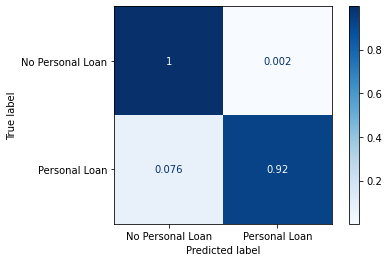

In [45]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , rf , "Random Forest Classifier")   
confusion_matrix_plot(X_test , y_test , rf , "Random Forest Classifier")

### Support Vector Machine

In [46]:
svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred = svm.predict(X_test)
svm.score(X_test , y_test)  

0.9

Accuracy Score is :0.9
Precision Score is :0.9
Recall Score is :0.124
f1  Score is :0.203
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1480
           1       0.57      0.12      0.20       170

    accuracy                           0.90      1650
   macro avg       0.74      0.56      0.57      1650
weighted avg       0.87      0.90      0.87      1650



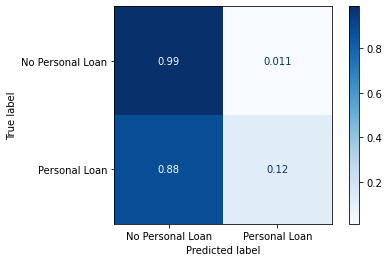

In [47]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , svm , "Support Vector Machine")   
confusion_matrix_plot(X_test , y_test , svm , "Support Vector Machine")

### DecisionTreeClassifier

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc.score(X_test , y_test) 

0.9836363636363636

Accuracy Score is :0.984
Precision Score is :0.984
Recall Score is :0.918
f1  Score is :0.92
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1480
           1       0.92      0.92      0.92       170

    accuracy                           0.98      1650
   macro avg       0.96      0.95      0.96      1650
weighted avg       0.98      0.98      0.98      1650



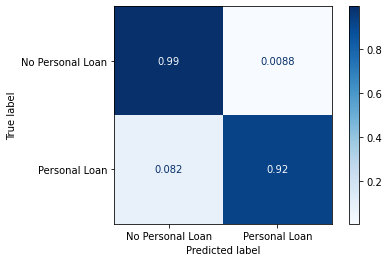

In [49]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , dtc , "Decision Tree Classifier")   
confusion_matrix_plot(X_test , y_test , dtc , "Decision Tree Classifier")

In [50]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list , 'f1_score':f1_score_list , 'Recall':recall_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df 

,Model,Accuracy,Precision,f1_score,Recall
2,Random Forest Classifier,0.990,0.990,0.952,0.924
4,Decision Tree Classifier,0.984,0.984,0.920,0.918
0,Logistic Reegression,0.966,0.966,0.818,0.741
3,Support Vector Machine,0.900,0.900,0.203,0.124
1,Knn Classifier,0.893,0.893,0.295,0.218
